In [1]:
import glob
import matplotlib as mlib
import matplotlib.pyplot as plt
import scipy.interpolate as inter
import numpy as np
from numpy.core.defchararray import add
from numpy import genfromtxt
from numpy import loadtxt
import re
import csv
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.patches as mpatches

In [2]:
#Plotting settings
font = {
        'weight' : 'normal',
        'size'   : 16}

mlib.rc('font', **font)

In [3]:
def calcOnGrid(inputarr, inputXAxis, inputYAxis, gridArr, *args, **kwargs):
    
    if "k" not in kwargs:
        kwargs["k"] = 1
    interpData=inter.InterpolatedUnivariateSpline(inputarr[:,inputXAxis],inputarr[:,inputYAxis], *args, **kwargs)
    
    arrInterp = interpData(gridArr)
    #return np.vstack((gridArr,arrInterp)).T
    return arrInterp

def expVStheo(expfile,theofile,muORpi):
    inputExparr = np.array(genfromtxt(expfile, comments="#", delimiter='\t'))
    inputExparr=inputExparr[np.argsort(inputExparr[:, 0])]
    inputTheoarr = np.array(genfromtxt(theofile,  comments="#", delimiter='\t'))
    
    marr=inputTheoarr[:,0]
    
    #Calculatins Gamma_exp for the mases given by inputTheo file
    expBR=calcOnGrid(inputExparr,0,1,marr)
    
    if (muORpi=="mu"):
        theoBR=inputTheoarr[:,4]
    if (muORpi=="pi"):
        theoBR=inputTheoarr[:,5]
    
    ifAllowed=np.heaviside(expBR-theoBR,0)
    
    newset=np.vstack((expBR, ifAllowed))
    
    # m(phi) [GeV], alpha, tau(phi) [ps], BR(phi->inv),BRTheo(B+->Kmumu), BRExp(B+->Kmumu), BRExp(B+->Kpipi),\
    #allowed/excluded(1/0) for a specified decay product
    fullset=np.append(inputTheoarr.T,newset, axis=0).T
    return(fullset)

def plotAllowed(expfile,theofile,muORpi):
    params = expVStheo(expfile,theofile,muORpi)
    allowed=params[:,7]==1

    plt.scatter(params[allowed,0], params[allowed,1], c='green')
    plt.scatter(params[~allowed,0], params[~allowed,1], c='red')

# Br(phi -> inv)=0, decay to muons

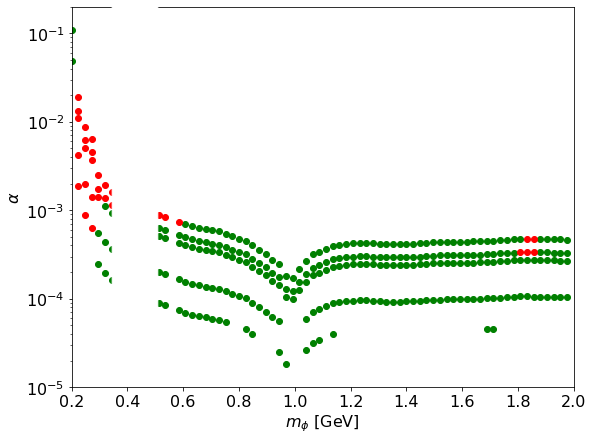

In [96]:
#Plotting for the parameters studied
f=plt.figure(figsize=(9, 7))

expfolder="Experimental_files/BaBar_bounds/"
theofolder="B-Xsxx/B-Xsxx_Br0/"

plotAllowed(expfolder+"mumu_ctau1cm.dat",theofolder+"theo_params_ctau_1.dat","mu")
plotAllowed(expfolder+"mumu_ctau2cm.dat",theofolder+"theo_params_ctau_2.dat","mu")
plotAllowed(expfolder+"mumu_ctau3cm.dat",theofolder+"theo_params_ctau_3.dat","mu")
plotAllowed(expfolder+"mumu_ctau20cm.dat",theofolder+"theo_params_ctau_20.dat","mu")
plotAllowed(expfolder+"mumu_ctau100cm.dat",theofolder+"theo_params_ctau_100.dat","mu")

#not covered by data
m=np.linspace(0.2,2,num=100);
plt.fill_between(m,1-np.heaviside(m - 0.35,0)*np.heaviside(-m + 0.5,0),1,color="white",zorder=4)

plt.xlim( (0.2, 2))
plt.ylim((10**(-5),2*10**(-1)))

plt.yscale("log")

#plt.title(''.format(i))
plt.xlabel('$m_\\phi$ [GeV]')
plt.ylabel('$\\alpha$')

plt.savefig('./results/BaBaR-mu_BR0_scans.png')

# Br(phi -> inv)=0.1, decay to muons

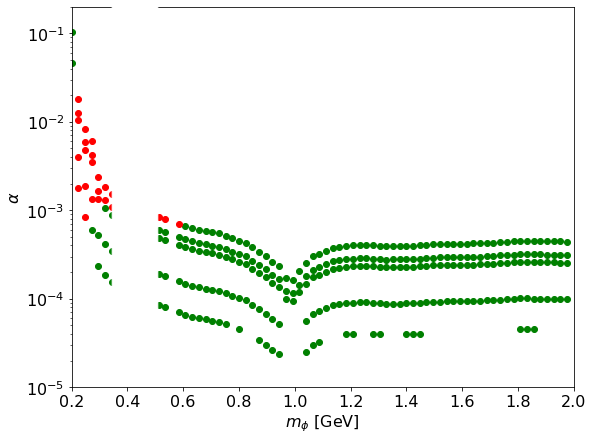

In [5]:
#Plotting for the parameters studied
f=plt.figure(figsize=(9, 7))

expfolder="Experimental_files/BaBar_bounds/"
theofolder="B-Xsxx/B-Xsxx_Br0.1/"

plotAllowed(expfolder+"mumu_ctau1cm.dat",theofolder+"theo_params_ctau_1.dat","mu")
plotAllowed(expfolder+"mumu_ctau2cm.dat",theofolder+"theo_params_ctau_2.dat","mu")
plotAllowed(expfolder+"mumu_ctau3cm.dat",theofolder+"theo_params_ctau_3.dat","mu")
plotAllowed(expfolder+"mumu_ctau20cm.dat",theofolder+"theo_params_ctau_20.dat","mu")
plotAllowed(expfolder+"mumu_ctau100cm.dat",theofolder+"theo_params_ctau_100.dat","mu")

#not covered by data
m=np.linspace(0.2,2,num=100);
plt.fill_between(m,1-np.heaviside(m - 0.35,0)*np.heaviside(-m + 0.5,0),1,color="white",zorder=4)

plt.xlim( (0.2, 2))
plt.ylim((10**(-5),2*10**(-1)))

plt.yscale("log")

#plt.title(''.format(i))
plt.xlabel('$m_\\phi$ [GeV]')
plt.ylabel('$\\alpha$')

plt.savefig('./results/BaBaR-mu_BR0.1_scans.png')

# Br(phi -> inv)=0.5, decay to muons

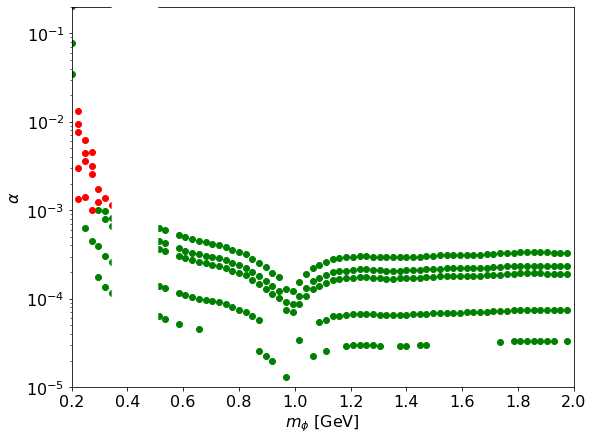

In [91]:
#Plotting for the parameters studied
plt.figure(figsize=(9, 7))

expfolder="Experimental_files/BaBar_bounds/"
theofolder="B-Xsxx/B-Xsxx_Br0.5/"

plotAllowed(expfolder+"mumu_ctau1cm.dat",theofolder+"theo_params_ctau_1.dat","mu")
plotAllowed(expfolder+"mumu_ctau2cm.dat",theofolder+"theo_params_ctau_2.dat","mu")
plotAllowed(expfolder+"mumu_ctau3cm.dat",theofolder+"theo_params_ctau_3.dat","mu")
plotAllowed(expfolder+"mumu_ctau20cm.dat",theofolder+"theo_params_ctau_20.dat","mu")
plotAllowed(expfolder+"mumu_ctau100cm.dat",theofolder+"theo_params_ctau_100.dat","mu")

#not covered by data
m=np.linspace(0.2,2,num=100);
plt.fill_between(m,1-np.heaviside(m - 0.35,0)*np.heaviside(-m + 0.5,0),1,color="white",zorder=4)

plt.xlim( (0.2, 2))
plt.ylim((10**(-5),2*10**(-1)))

plt.yscale("log")

#plt.title(''.format(i))
plt.xlabel('$m_\\phi$ [GeV]')
plt.ylabel('$\\alpha$')

plt.savefig('./results/BaBaR-mu_BR0.5_scans.png')

# Br(phi -> inv)=0, decay to pions

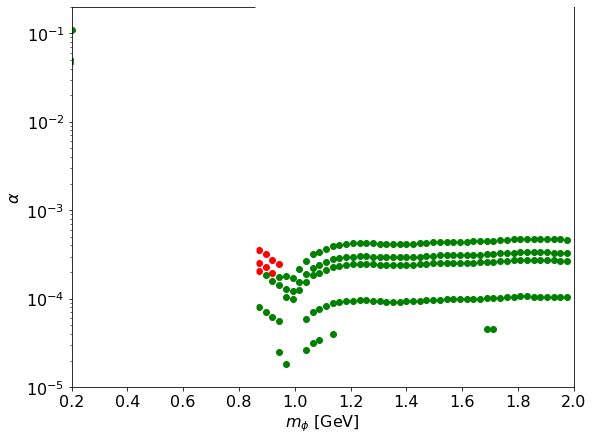

In [90]:
#Plotting for the parameters studied
plt.figure(figsize=(9, 7))

expfolder="Experimental_files/BaBar_bounds/"
theofolder="B-Xsxx/B-Xsxx_Br0/"

plotAllowed(expfolder+"pipi_ctau1cm.dat",theofolder+"theo_params_ctau_1.dat","pi")
plotAllowed(expfolder+"pipi_ctau2cm.dat",theofolder+"theo_params_ctau_2.dat","pi")
plotAllowed(expfolder+"pipi_ctau3cm.dat",theofolder+"theo_params_ctau_3.dat","pi")
plotAllowed(expfolder+"pipi_ctau20cm.dat",theofolder+"theo_params_ctau_20.dat","pi")
plotAllowed(expfolder+"pipi_ctau100cm.dat",theofolder+"theo_params_ctau_100.dat","pi")

#not covered by data
m=np.linspace(0.21,2,num=100);
plt.fill_between(m,np.heaviside(m - 0.85,0),0.1,color="white",zorder=4)

plt.xlim( (0.2, 2))
plt.ylim((10**(-5),2*10**(-1)))

plt.yscale("log")

#plt.title(''.format(i))
plt.xlabel('$m_\\phi$ [GeV]')
plt.ylabel('$\\alpha$')

plt.savefig('./results/BaBaR-pi_BR0_scans.png')

# Br(phi -> inv)=0.1, decay to pions

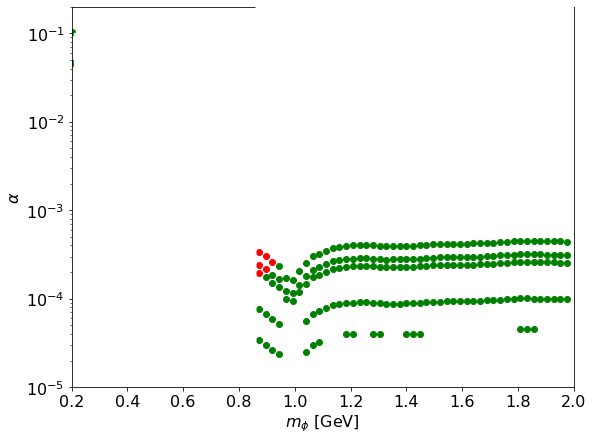

In [6]:
#Plotting for the parameters studied
plt.figure(figsize=(9, 7))

expfolder="Experimental_files/BaBar_bounds/"
theofolder="B-Xsxx/B-Xsxx_Br0.1/"

plotAllowed(expfolder+"pipi_ctau1cm.dat",theofolder+"theo_params_ctau_1.dat","pi")
plotAllowed(expfolder+"pipi_ctau2cm.dat",theofolder+"theo_params_ctau_2.dat","pi")
plotAllowed(expfolder+"pipi_ctau3cm.dat",theofolder+"theo_params_ctau_3.dat","pi")
plotAllowed(expfolder+"pipi_ctau20cm.dat",theofolder+"theo_params_ctau_20.dat","pi")
plotAllowed(expfolder+"pipi_ctau100cm.dat",theofolder+"theo_params_ctau_100.dat","pi")

#not covered by data
m=np.linspace(0.21,2,num=100);
plt.fill_between(m,np.heaviside(m - 0.85,0),0.1,color="white",zorder=4)

plt.xlim( (0.2, 2))
plt.ylim((10**(-5),2*10**(-1)))

plt.yscale("log")

#plt.title(''.format(i))
plt.xlabel('$m_\\phi$ [GeV]')
plt.ylabel('$\\alpha$')

plt.savefig('./results/BaBaR-pi_BR0.1_scans.png')

# Br(phi -> inv)=0.2, decay to pions

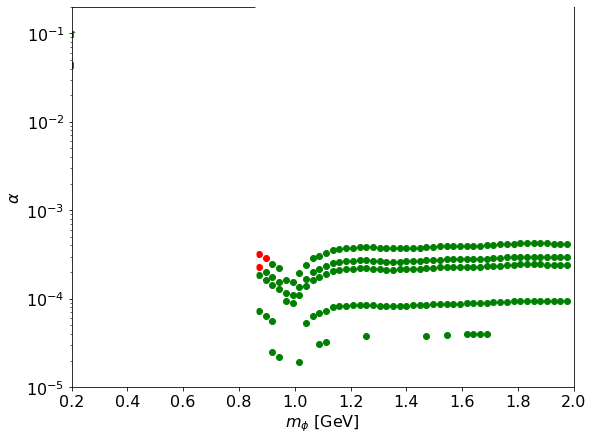

In [7]:
#Plotting for the parameters studied
plt.figure(figsize=(9, 7))

expfolder="Experimental_files/BaBar_bounds/"
theofolder="B-Xsxx/B-Xsxx_Br0.2/"

plotAllowed(expfolder+"pipi_ctau1cm.dat",theofolder+"theo_params_ctau_1.dat","pi")
plotAllowed(expfolder+"pipi_ctau2cm.dat",theofolder+"theo_params_ctau_2.dat","pi")
plotAllowed(expfolder+"pipi_ctau3cm.dat",theofolder+"theo_params_ctau_3.dat","pi")
plotAllowed(expfolder+"pipi_ctau20cm.dat",theofolder+"theo_params_ctau_20.dat","pi")
plotAllowed(expfolder+"pipi_ctau100cm.dat",theofolder+"theo_params_ctau_100.dat","pi")

#not covered by data
m=np.linspace(0.21,2,num=100);
plt.fill_between(m,np.heaviside(m - 0.85,0),0.1,color="white",zorder=4)

plt.xlim( (0.2, 2))
plt.ylim((10**(-5),2*10**(-1)))

plt.yscale("log")

#plt.title(''.format(i))
plt.xlabel('$m_\\phi$ [GeV]')
plt.ylabel('$\\alpha$')

plt.savefig('./results/BaBaR-pi_BR0.2_scans.png')

# Br(phi -> inv)=0.3, decay to pions

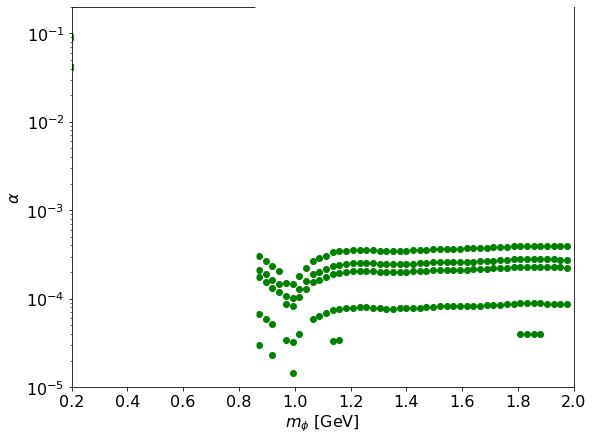

In [10]:
#Plotting for the parameters studied
plt.figure(figsize=(9, 7))

expfolder="Experimental_files/BaBar_bounds/"
theofolder="B-Xsxx/B-Xsxx_Br0.3/"

plotAllowed(expfolder+"pipi_ctau1cm.dat",theofolder+"theo_params_ctau_1.dat","pi")
plotAllowed(expfolder+"pipi_ctau2cm.dat",theofolder+"theo_params_ctau_2.dat","pi")
plotAllowed(expfolder+"pipi_ctau3cm.dat",theofolder+"theo_params_ctau_3.dat","pi")
plotAllowed(expfolder+"pipi_ctau20cm.dat",theofolder+"theo_params_ctau_20.dat","pi")
plotAllowed(expfolder+"pipi_ctau100cm.dat",theofolder+"theo_params_ctau_100.dat","pi")

#not covered by data
m=np.linspace(0.21,2,num=100);
plt.fill_between(m,np.heaviside(m - 0.85,0),0.1,color="white",zorder=4)

plt.xlim( (0.2, 2))
plt.ylim((10**(-5),2*10**(-1)))

plt.yscale("log")

#plt.title(''.format(i))
plt.xlabel('$m_\\phi$ [GeV]')
plt.ylabel('$\\alpha$')

plt.savefig('./results/BaBaR-pi_BR0.3_scans.png')

# Br(phi -> inv)=0.5, decay to pions

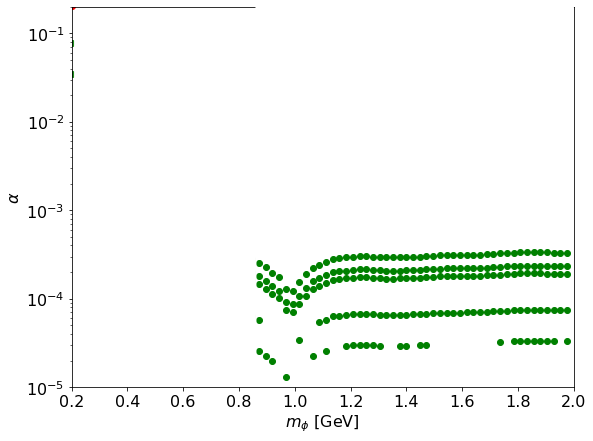

In [92]:
#Plotting for the parameters studied
plt.figure(figsize=(9, 7))

expfolder="Experimental_files/BaBar_bounds/"
theofolder="B-Xsxx/B-Xsxx_Br0.5/"

plotAllowed(expfolder+"pipi_ctau1cm.dat",theofolder+"theo_params_ctau_1.dat","pi")
plotAllowed(expfolder+"pipi_ctau2cm.dat",theofolder+"theo_params_ctau_2.dat","pi")
plotAllowed(expfolder+"pipi_ctau3cm.dat",theofolder+"theo_params_ctau_3.dat","pi")
plotAllowed(expfolder+"pipi_ctau20cm.dat",theofolder+"theo_params_ctau_20.dat","pi")
plotAllowed(expfolder+"pipi_ctau100cm.dat",theofolder+"theo_params_ctau_100.dat","pi")

#not covered by data
m=np.linspace(0.21,2,num=100);
plt.fill_between(m,np.heaviside(m - 0.85,0),0.1,color="white",zorder=4)

plt.xlim( (0.2, 2))
plt.ylim((10**(-5),2*10**(-1)))

plt.yscale("log")

#plt.title(''.format(i))
plt.xlabel('$m_\\phi$ [GeV]')
plt.ylabel('$\\alpha$')

plt.savefig('./results/BaBaR-pi_BR0.5_scans.png')